![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install livelossplot

In [3]:
# Importación librerías
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.callbacks import EarlyStopping, ModelCheckpoint
from math import sqrt

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [4]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


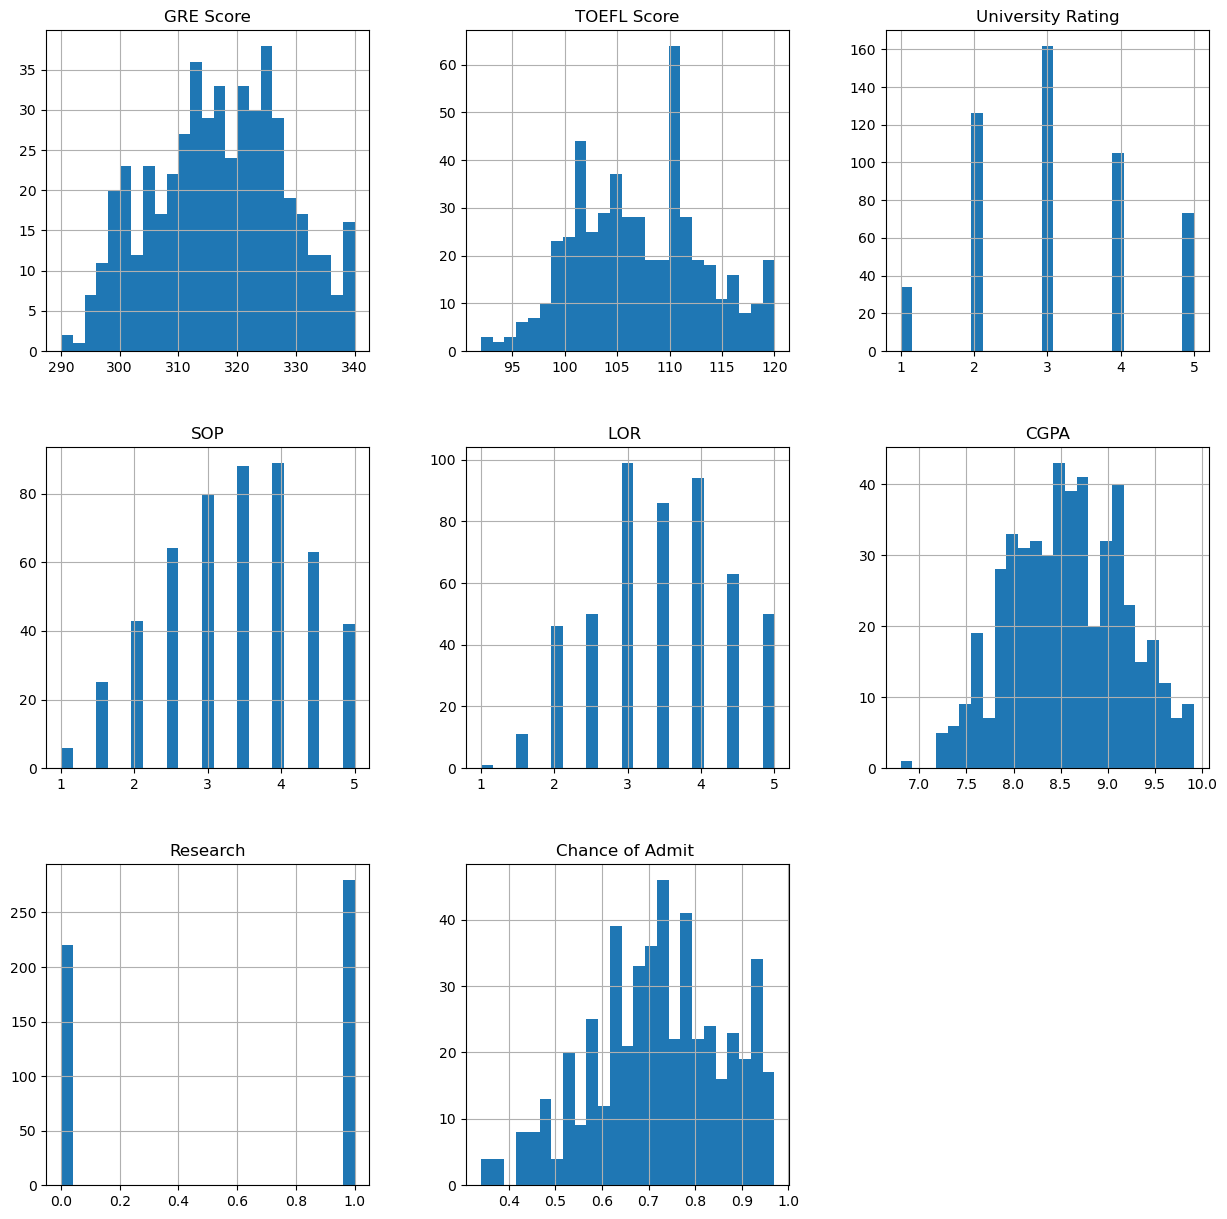

In [5]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [6]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [7]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler
# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

In [8]:
# función genérica para graficar
def graficar(x, y, medida, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 6))
    sns.barplot(x=x, y=y, palette='viridis', ax=ax)
    # valores de las barras
    for i, v in enumerate(y):
        ax.text(i, v, '{:.4f}'.format(v), ha='center', va='bottom')
    ax.set_title(f'Comparación {medida}')
    plt.tight_layout()

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

#### Selección de Hiperparámetros con Bucles For



In [9]:
# Semilla
np.random.seed(952)

# Definición de dimensiones de salida, variables de interés
output_var = 1
print(output_var, 'output variables')

# Definición de dimensiones de entrada, variables predictoras
dims = xTrain.shape[1]
print(dims, 'input variables')

Funcion_Perdida = 'mean_squared_error'
# Red Neuronal de una capa y una neurona con la libreria Keras
def Crear_Modelo_RN1(Funcion_Perdida, Optimizador):
    K.clear_session()
    modelo = Sequential()
    modelo.add(Dense(output_var, input_shape=(dims,)))
    modelo.compile(optimizer=Optimizador, loss=Funcion_Perdida)
    return modelo

# Definicion de hiperparametros
Optimizadores = ['sgd', 'adam', 'rmsprop']
Epocas = [1] + list(range(0, 152, 20))[1:]

Mejor_MSE = float('inf')
Mejores_Hiperparametros = {}

# Busqueda de Hiperparametros
for Optimizador in Optimizadores:
    for Epoca in Epocas:
        #Crear Modelo
        Modelo = Crear_Modelo_RN1(Funcion_Perdida, Optimizador)
        #Entrenar Modelo
        Modelo.fit(xTrain, yTrain, verbose=0, epochs=Epoca, validation_data=(xTest, yTest))
        # Evaluar Modelo
        y_pred = Modelo.predict(xTest)
        MSE = mean_squared_error(yTest, y_pred)
        MAE = mean_absolute_error(yTest, y_pred)

        if MSE < Mejor_MSE :
            Mejor_MSE = MSE
            Mejores_Hiperparametros = {'Funcion Perdida': Funcion_Perdida, 'Optimizador': Optimizador, 'Epocas': Epoca}

print("Mejor MSE: {:.3f}".format(Mejor_MSE))
print("Mejores Hiperparámetros:", Mejores_Hiperparametros)

1 output variables
7 input variables
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Mejor MSE: 0.003
Mejores Hiperparámetros: {'Funcion

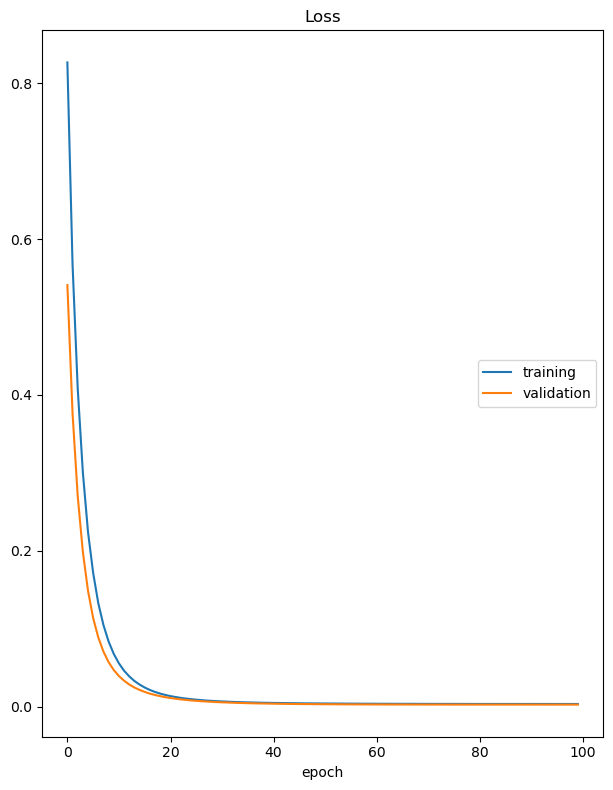

Loss
	training         	 (min:    0.004, max:    0.826, cur:    0.004)
	validation       	 (min:    0.003, max:    0.541, cur:    0.003)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Metricas del modelo
MSE Modelo 1= 0.003 
MAE Modelo 1= 0.041 
RMSE Modelo 1= 0.055


In [10]:
# Semilla
np.random.seed(952)
# Crear Modelo
Modelo_1 = Crear_Modelo_RN1(Funcion_Perdida, 'sgd')
# Entrenar Modelo
Modelo_1.fit(xTrain, yTrain, verbose=0, epochs=100, validation_data=(xTest, yTest),callbacks=[PlotLossesKeras()])
#Evaluación del Modelo (Red Neuronal con 1 capa)
y_pred_m1 = Modelo_1.predict(xTest)
mse_m1 = mean_squared_error(yTest, y_pred_m1)
mae_m1 = mean_absolute_error(yTest, y_pred_m1)
rmse_m1 = np.sqrt(mse_m1)
print("Metricas del modelo\nMSE Modelo 1= {:.3f} \nMAE Modelo 1= {:.3f} \nRMSE Modelo 1= {:.3f}".format(mse_m1, mae_m1, rmse_m1))

#### Selección de epocas con analisis de grafica

Considerando la calibración del modelo, se determinó que los hiperparámetros óptimos eran el optimizador 'sgd' y 100 épocas. No obstante, al analizar el gráfico generado, se observa que el modelo comienza a converger a partir de la época 40. Por lo tanto, se presenta a continuación un modelo ajustado con 40 épocas utilizando el mismo optimizador.

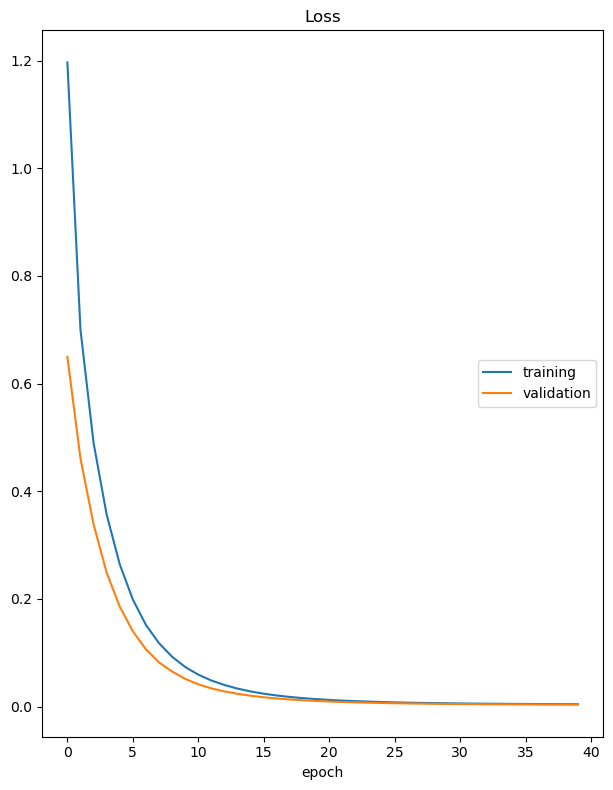

Loss
	training         	 (min:    0.004, max:    1.196, cur:    0.004)
	validation       	 (min:    0.004, max:    0.650, cur:    0.004)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Metricas del modelo
MSE Modelo 1b= 0.004 
MAE Modelo 1b= 0.046 
RMSE Modelo 1b= 0.061


In [11]:
# Crear Modelo
Modelo_1b = Crear_Modelo_RN1(Funcion_Perdida, 'sgd')
# Entrenar Modelo
Modelo_1b.fit(xTrain, yTrain, verbose=0, epochs=40, validation_data=(xTest, yTest),callbacks=[PlotLossesKeras()])
#Evaluación del Modelo (Red Neuronal con 1 capa)
y_pred_m1b = Modelo_1b.predict(xTest)
mse_m1b = mean_squared_error(yTest, y_pred_m1b)
mae_m1b = mean_absolute_error(yTest, y_pred_m1b)
rmse_m1b = np.sqrt(mse_m1b)
print("Metricas del modelo\nMSE Modelo 1b= {:.3f} \nMAE Modelo 1b= {:.3f} \nRMSE Modelo 1b= {:.3f}".format(mse_m1b, mae_m1b, rmse_m1b))

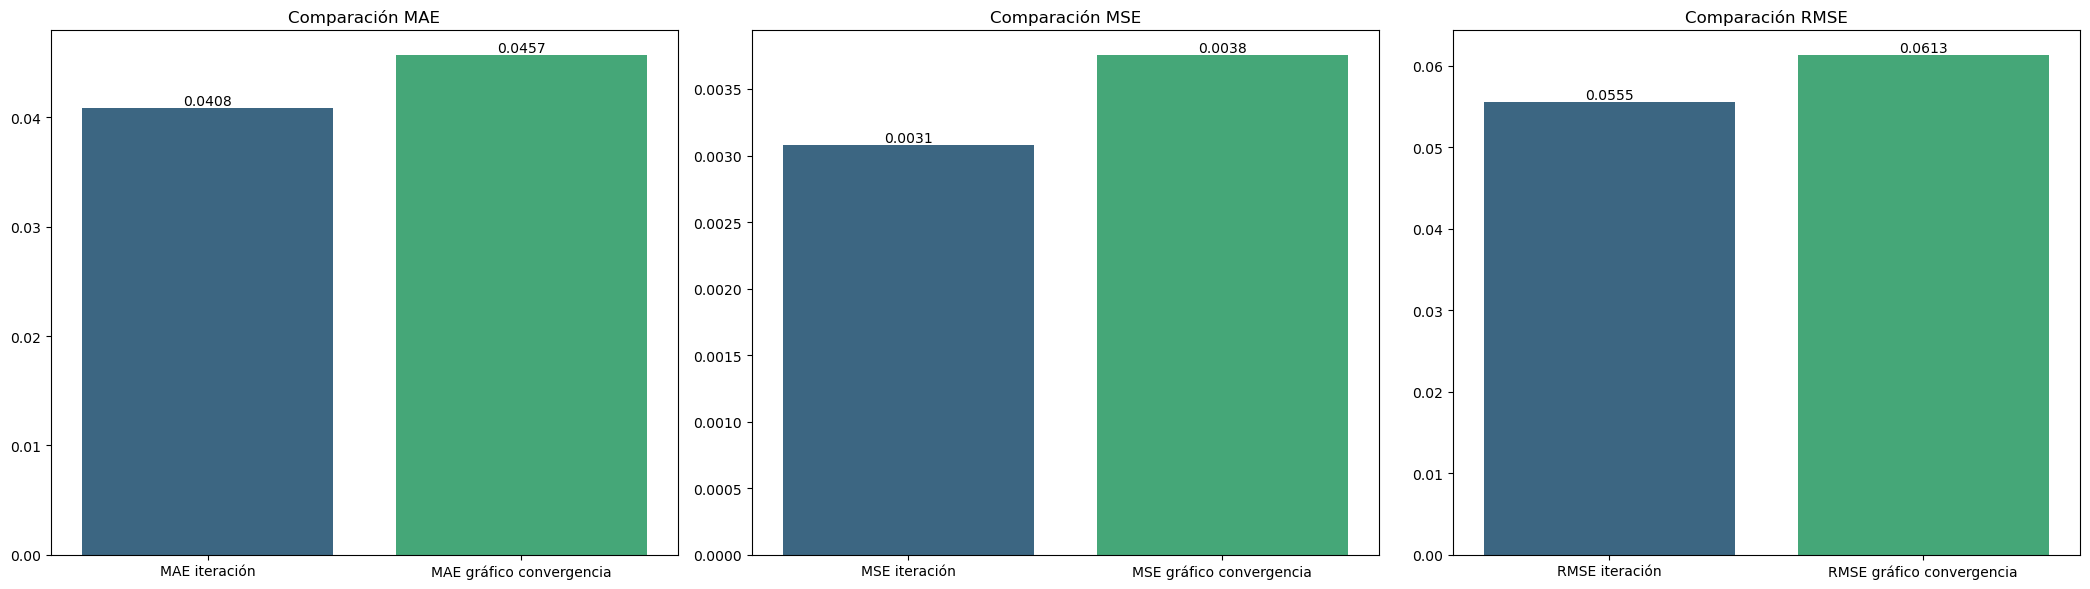

In [12]:
x1 = ['MAE iteración', 'MAE gráfico convergencia']
y1 = [mae_m1, mae_m1b]
x2 = ['MSE iteración', 'MSE gráfico convergencia']
y2 = [mse_m1, mse_m1b]
x3 = ['RMSE iteración', 'RMSE gráfico convergencia']
y3 = [rmse_m1, rmse_m1b]


fig, axes = plt.subplots(1, 3, figsize=(21, 6))

graficar(x1, y1, 'MAE', axes[0])
graficar(x2, y2, 'MSE', axes[1])
graficar(x3, y3, 'RMSE', axes[2])
plt.tight_layout()
plt.show()

**Justificacion de Hiperparametros:**

- **Funcion de perdida - mean_squared_error:** Teniendo en cuenta que este es un problema de regresión, decidimos usar el error cuadrático medio (MSE) como función de pérdida, ademas, uno de sus beneficios es que penaliza de manera efectiva los errores grandes y al hacerlo buscamos mejorar la precisión del modelo y asegurar así un mejor ajuste sobre los datos.

- **Optimizador - sgd**: Se evaluan diferentes optimizadores como adam (ajusta la tasa de aprendizaje por parámetro teniendo en cuenta el momento y el histórico de gradientes), sgd (ajusta los pesos con una tasa de aprendizaje constante) y rmsprop (ajusta la tasa de aprendizaje por parámetro teniendo en cuenta en el histórico de gradientes). Al ejecutar el bucle for para encontrar las mejores combinaciones entre épocas y optimizadores que reduzcan el MSE en el modelo, se identifica en este caso, que el optimizador de Gradiente Descendente Estocástico (sgd) es el mejor para predecir la probabilidad de admisión a la universidad.

- **Epocas**: Durante la calibración del modelo, se determinó inicialmente que el número óptimo de épocas era de 100 mediante un proceso iterativo. Sin embargo, al analizar el gráfico, se observó que el modelo comenzaba a converger a partir de la época 40, por lo cual, se optó por crear un nuevo modelo limitando el entrenamiento a esa cantidad de épocas, con el objetivo de realizar una evaluación más detallada de su desempeño.  

  En el análisis comparativo, se observó que las métricas de desempeño, tanto en los datos de entrenamiento como en los de prueba, mostraban resultados óptimos para el modelo calibrado con iteraciones. Este modelo alcanzó un valor de MSE de 0.003, indicando una excelente capacidad de generalización.

<br>

**Análisis de Resultados:**

Al comparar los dos modelos calibrados, se observa que las métricas de desempeño del modelo calibrado mediante iteraciones son menores que las del modelo calibrado teniendo en cuenta la gráfica de convergencia. Esto sugiere que el modelo calibrado mediante iteraciones tiene un mejor desempeño en general. A partir de este análisis, podemos concluir que el incremento en el número de épocas mejora el desempeño del modelo. Sin embargo, se llega a un punto óptimo donde la mejora en el MSE deja de ser significativa.

**Analisis del modelo calibrado mediante iteraciones:** Al crear, entrenar y calibrar el modelo, observamos un MSE de 0.003. Además, al analizar el RMSE, obtenemos un valor de 0.055, lo que indica que, en promedio, existe una diferencia del 5,5% entre las probabilidades reales y las predichas de ser admitido en la universidad. Estos resultados indican un ajuste óptimo del modelo, con una buena capacidad de generalización.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

#### Selección de Hiperparámetros con Bucles For

In [13]:
# Red Neuronal de varias capas y neuronas con la libreria Keras
Funcion_Perdida = 'mean_squared_error'
def Crear_Modelo_RN2(Funcion_Perdida, Optimizador, Neuronas):
    K.clear_session()
    modelo = Sequential()
    modelo.add(Dense(Neuronas, input_shape=(dims,),activation='relu'))
    modelo.add(Dense(Neuronas,activation='relu'))
    modelo.add(Dense(output_var))
    modelo.add(Activation('relu'))
    modelo.compile(optimizer=Optimizador, loss=Funcion_Perdida)
    return modelo

# Definicion de hiperparametros
Optimizadores = ['sgd']
Epocas = [1] + list(range(0, 152, 20))[1:]
Neuronas = [1] + list(range(0, 152, 20))[1:] #n^2

Mejor_MSE = float('inf')
Mejores_Hiperparametros = {}

# Busqueda de Hiperparametros
for Optimizador in Optimizadores:
    for Neurona in Neuronas:
        for Epoca in Epocas:
            #Crear Modelo
            Modelo = Crear_Modelo_RN2(Funcion_Perdida, Optimizador, Neurona)
            #Entrenar Modelo
            Modelo.fit(xTrain, yTrain, verbose=0, epochs=Epoca, validation_data=(xTest, yTest))
            # Evaluar Modelo
            y_pred = Modelo.predict(xTest)
            MSE = mean_squared_error(yTest, y_pred)
            MAE = mean_absolute_error(yTest, y_pred)

            if MSE < Mejor_MSE :
                Mejor_MSE = MSE
                print(Mejor_MSE)
                Mejores_Hiperparametros = {'Funcion Perdida': Funcion_Perdida, 'Optimizador': Optimizador, 'Epocas': Epoca, 'Neuronas': Neurona}

print("Mejor MSE: {:.3f}".format(Mejor_MSE))
print("Mejores Hiperparámetros:", Mejores_Hiperparametros)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
0.5262680000000001
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
0.01730610982000814
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
0.01537848317273293
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
0.010558508898639312
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
0.007239318300244311
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
0.006545804773528505
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 

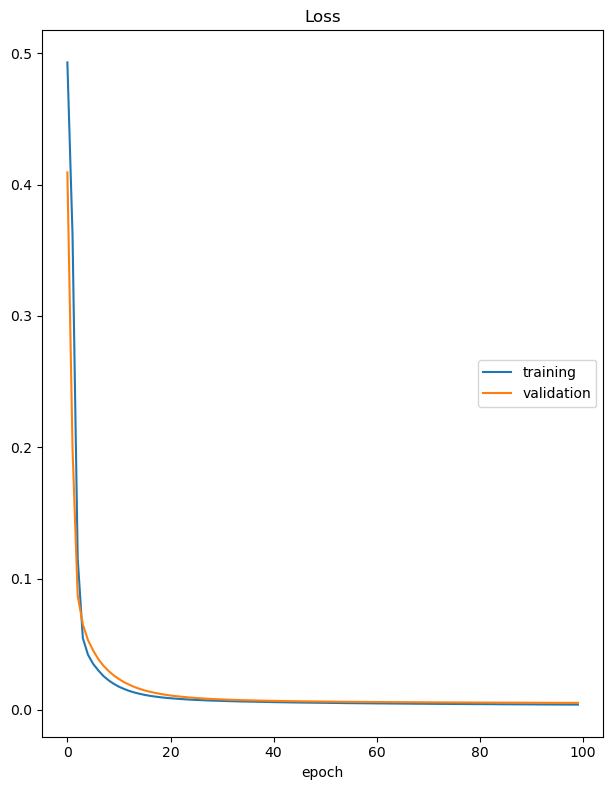

Loss
	training         	 (min:    0.004, max:    0.493, cur:    0.004)
	validation       	 (min:    0.005, max:    0.409, cur:    0.005)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Metricas del modelo
MSE Modelo 2= 0.005 
MAE Modelo 2= 0.056 
RMSE Modelo 2= 0.073


In [14]:
# Semilla
np.random.seed(952)
# Crear Modelo
Modelo_2 = Crear_Modelo_RN2(Funcion_Perdida, 'sgd',100)
# Entrenar Modelo
Modelo_2.fit(xTrain, yTrain, verbose=0, epochs=100, validation_data=(xTest, yTest),callbacks=[PlotLossesKeras()])
#Evaluación del Modelo (Red Neuronal con varias capas)
y_pred_m2 = Modelo_2.predict(xTest)
mse_m2 = mean_squared_error(yTest, y_pred_m2)
mae_m2 = mean_absolute_error(yTest, y_pred_m2)
rmse_m2 = np.sqrt(mse_m2)
print("Metricas del modelo\nMSE Modelo 2= {:.3f} \nMAE Modelo 2= {:.3f} \nRMSE Modelo 2= {:.3f}".format(mse_m2, mae_m2, rmse_m2))

#### Selección de epocas con analisis de grafica

Considerando la calibración del modelo, se determinó que los hiperparámetros óptimos eran el optimizador 'sgd', 100 épocas y 100 neuronas. No obstante, al analizar el gráfico generado, se observa que el modelo comienza a converger a partir de la época 60. Por lo tanto, se presenta a continuación un modelo ajustado con 60 épocas utilizando el mismo optimizador y la misma cantidad de neuronas.

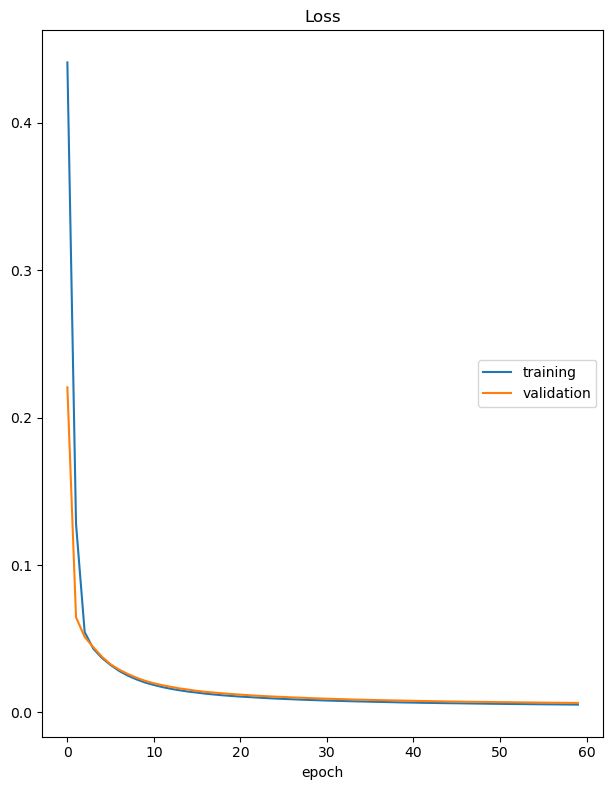

Loss
	training         	 (min:    0.005, max:    0.441, cur:    0.005)
	validation       	 (min:    0.006, max:    0.221, cur:    0.006)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Metricas del modelo
MSE Modelo 2b= 0.006 
MAE Modelo 2b= 0.063 
RMSE Modelo 2b= 0.080


In [15]:
# Crear Modelo
Modelo_2b = Crear_Modelo_RN2(Funcion_Perdida, 'sgd',100)
# Entrenar Modelo
Modelo_2b.fit(xTrain, yTrain, verbose=0, epochs=60, validation_data=(xTest, yTest),callbacks=[PlotLossesKeras()])
#Evaluación del Modelo (Red Neuronal con varias capas)
y_pred_m2b = Modelo_2b.predict(xTest)
mse_m2b = mean_squared_error(yTest, y_pred_m2b)
mae_m2b = mean_absolute_error(yTest, y_pred_m2b)
rmse_m2b = np.sqrt(mse_m2b)
print("Metricas del modelo\nMSE Modelo 2b= {:.3f} \nMAE Modelo 2b= {:.3f} \nRMSE Modelo 2b= {:.3f}".format(mse_m2b, mae_m2b, rmse_m2b))

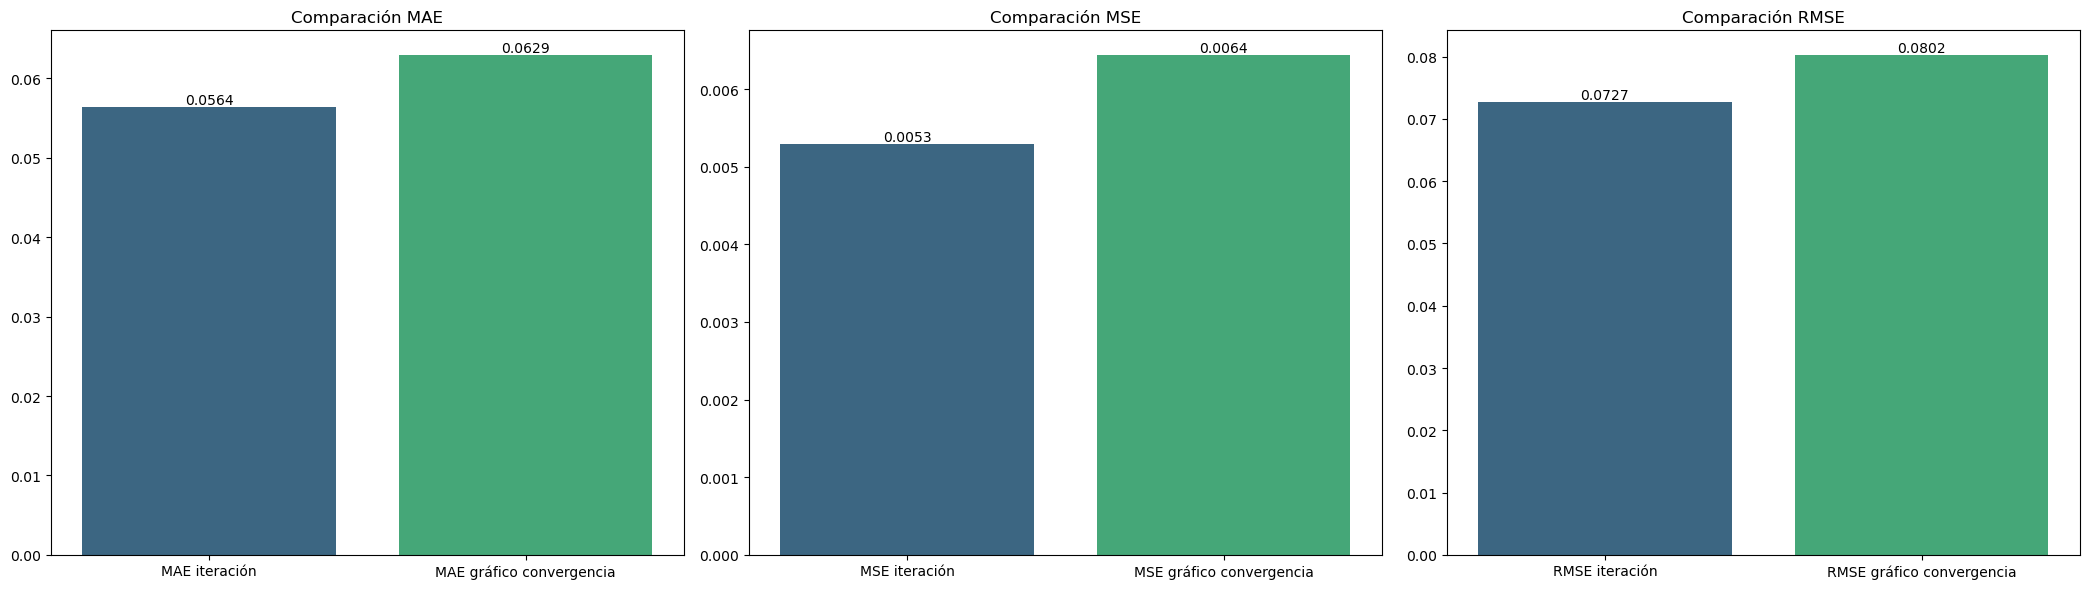

In [16]:
x1 = ['MAE iteración', 'MAE gráfico convergencia']
y1 = [mae_m2, mae_m2b]
x2 = ['MSE iteración', 'MSE gráfico convergencia']
y2 = [mse_m2, mse_m2b]
x3 = ['RMSE iteración', 'RMSE gráfico convergencia']
y3 = [rmse_m2, rmse_m2b]


fig, axes = plt.subplots(1, 3, figsize=(21, 6))

graficar(x1, y1, 'MAE', axes[0])
graficar(x2, y2, 'MSE', axes[1])
graficar(x3, y3, 'RMSE', axes[2])
plt.tight_layout()
plt.show()

**Justificacion de Hiperparametros:**

- **Funcion de perdida - mean_squared_error:** Teniendo en cuenta que este es un problema de regresión, decidimos usar el error cuadrático medio (MSE) como función de pérdida, ademas, uno de sus beneficios es que penaliza de manera efectiva los errores grandes y al hacerlo buscamos mejorar la precisión del modelo y asegurar así un mejor ajuste sobre los datos.

- **Optimizador - sgd**: Teniendo en cuenta el buen desempeño del optimizador de Gradiente Descendente Estocástico (sgd) en la minimización de la función de pérdida, se decide mantenerlo para evitar incrementar los tiempos de procesamiento debido a que en el modelo, se incrementa el número de capas y se incluye como nuevo hiperparámetro el número de neuronas.

- **Epocas**: Durante la calibración del modelo, se determinó inicialmente que el número óptimo de épocas era de 100 mediante un proceso iterativo. Sin embargo, al analizar el gráfico, se evidenció que el modelo comenzaba a converger a partir de la época 60, por lo cual, se optó por crear un nuevo modelo limitando el entrenamiento a esa cantidad de épocas, con el objetivo de realizar una evaluación más detallada de su desempeño.

  En el análisis comparativo, se observó que las métricas de desempeño, tanto en los datos de entrenamiento como en los de prueba, mostraban resultados óptimos para el modelo calibrado con iteraciones. Este modelo alcanzó un valor de MSE de 0.005, indicando una excelente capacidad de generalización.


- **Neuronas**: Al calibrar el modelo con diferentes números de neuronas (1, 20, 40, 60, 80, 100, 120, 140), se identifica que el número óptimo es de 100 neuronas. Al combinar este número de neuronas con el número de épocas optimo, se alcanza un MSE de 0.005, lo que indica una adecuada capacidad de generalización del modelo.

<br>

**Analisis de Resultados:**

Al comparar los dos modelos calibrados, se puede observar que las métricas de desempeño del modelo calibrado mediante iteraciones son ligeramente menores que las del modelo calibrado teniendo en cuenta la gráfica de convergencia, lo que indica que el modelo calibrado mediante iteraciones tiene un mejor desempeño. De acuerdo con esto, se puede decir que entrenar el modelo con 60 o 100 epocas no afecta significativamente el desempeño del modelo.

**Analisis del modelo calibrado mediante iteraciones:** Al crear, entrenar y evaluar el modelo, observamos un MSE de 0.005, lo que representa un aumento de 0.002 puntos con respecto al modelo anterior, aunque el modelo demuestra un buen rendimiento al agregar capas y neuronas, se obtiene un rendimiento ligeramente inferior. Además, al analizar el RMSE, obtenemos un valor de 0.073, lo que indica que, en promedio, existe una diferencia del 7,3% entre las probabilidades reales y las predichas de ser admitido en la universidad. Estos resultados indican un ajuste óptimo del modelo, con una buena capacidad de generalización.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [17]:
# Semilla
np.random.seed(952)
# Red Neuronal de varias capas y neuronas con la libreria Keras
Funcion_Perdida = 'mean_squared_error'
def Crear_Modelo_RN3(Funcion_Perdida, Optimizador, Neuronas):
    K.clear_session()
    modelo = Sequential()
    modelo.add(Dense(Neuronas, input_shape=(dims,),activation='relu'))
    modelo.add(Dropout(0.2)) # Se apagan el 20% de las neuronas
    modelo.add(Dense(Neuronas,activation='relu'))
    modelo.add(Dropout(0.2)) # Se apagan el 20% de las neuronas
    modelo.add(Dense(output_var))
    modelo.add(Activation('relu'))
    modelo.compile(optimizer=Optimizador, loss=Funcion_Perdida)
    return modelo

# Definicion de hiperparametros
Optimizadores = ['sgd']
Neuronas = [1] + list(range(0, 152, 20))[1:]

Mejor_MSE = float('inf')
Mejores_Hiperparametros = {}

# Busqueda de Hiperparametros
for Optimizador in Optimizadores:
    for Neurona in Neuronas:
        #Crear Modelo
        Modelo = Crear_Modelo_RN3(Funcion_Perdida, Optimizador, Neurona)
        # Definición de la función EarlyStopping para considerar durante el entrenamiento
        early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=0) # Detener el entrenamiento si no mejora la validación en 2 épocas
        # Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
        fBestModel = 'best_model.keras'
        best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)
        #Entrenar Modelo
        Modelo.fit(xTrain, yTrain, verbose=0, epochs=150, validation_data=(xTest, yTest), callbacks=[early_stop, best_model])
        Epocas = early_stop.stopped_epoch
        # Evaluar Modelo
        y_pred = Modelo.predict(xTest)
        MSE = mean_squared_error(yTest, y_pred)
        MAE = mean_absolute_error(yTest, y_pred)
        if MSE < Mejor_MSE :
            Mejor_MSE = MSE
            Mejores_Hiperparametros = {'Funcion Perdida': Funcion_Perdida, 'Optimizador': Optimizador, 'Epocas': Epocas, 'Neuronas': Neurona}

print("Mejor MSE: {:.3f}".format(Mejor_MSE))
print("Mejores Hiperparámetros:", Mejores_Hiperparametros)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Mejor MSE: 0.006
Mejores Hiperparámetros: {'Funcion Perdida': 'mean_squared_error', 'Optimizador': 'sgd', 'Epocas': 55, 'Neuronas': 60}


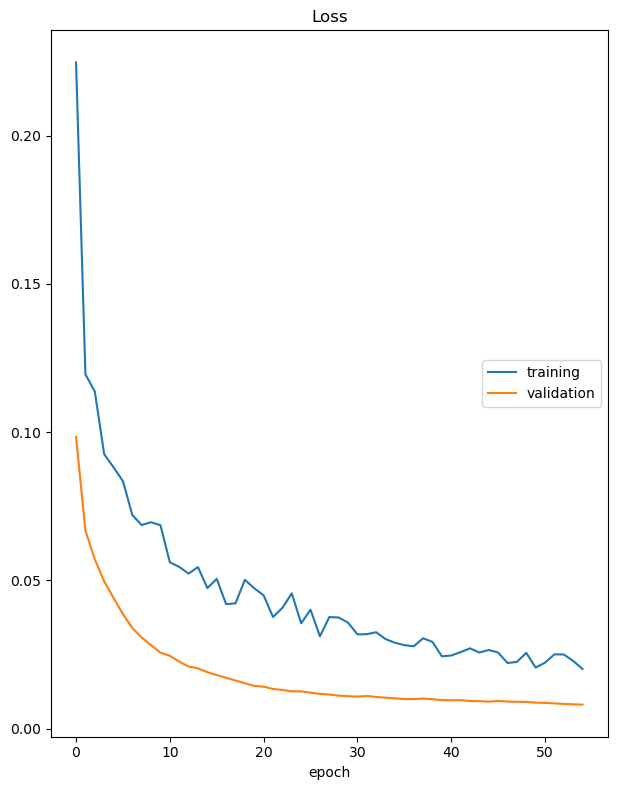

Loss
	training         	 (min:    0.020, max:    0.225, cur:    0.020)
	validation       	 (min:    0.008, max:    0.098, cur:    0.008)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Metricas del modelo
MSE Modelo 3= 0.008 
MAE Modelo 3= 0.069 
RMSE Modelo 3= 0.091


In [18]:
# Semilla
np.random.seed(952)
# Crear Modelo
Modelo_3 = Crear_Modelo_RN3(Funcion_Perdida, 'sgd', 60)
# Entrenar Modelo
Modelo_3.fit(xTrain, yTrain, verbose=0, epochs=55, validation_data=(xTest, yTest),callbacks=[PlotLossesKeras()])
#Evaluación del Modelo (Red Neuronal con varias capas)
y_pred_m3 = Modelo_3.predict(xTest)
mse_m3 = mean_squared_error(yTest, y_pred_m3)
mae_m3 = mean_absolute_error(yTest, y_pred_m3)
rmse_m3 = np.sqrt(mse_m3)
print("Metricas del modelo\nMSE Modelo 3= {:.3f} \nMAE Modelo 3= {:.3f} \nRMSE Modelo 3= {:.3f}".format(mse_m3, mae_m3, rmse_m3))

**Justificacion de Hiperparametros:**

- **Funcion de perdida - mean_squared_error:** Teniendo en cuenta que este es un problema de regresión, decidimos usar el error cuadrático medio (MSE) como función de pérdida, ademas, uno de sus beneficios es que penaliza de manera efectiva los errores grandes y al hacerlo buscamos mejorar la precisión del modelo y asegurar así un mejor ajuste sobre los datos.

- **Optimizador - sgd**: Teniendo en cuenta el buen desempeño del optimizador de Gradiente Descendente Estocástico (sgd) en la minimización de la función de pérdida, se decide mantenerlo para evitar incrementar los tiempos de procesamiento debido a que en el modelo, se incrementa el número de capas y se incluye como nuevo hiperparámetro el número de neuronas.

- **Epocas**: Se identifica el mejor numero de epocas con la funcion EarlyStopping, la cual detiene el entrenamiento modelo si no mejora el mse en 2 epocas, lo anterior dio como resultado un total de 55 epocas.

- **Neuronas**: Al calibrar el modelo con diferentes números de neuronas (1, 20, 40, 60, 80, 100, 120, 140), se identifica que el número óptimo es de 60 neuronas. Al combinar este número de neuronas con el número de épocas optimo, se alcanza un MSE de 0.008, lo que indica una adecuada capacidad de generalización del modelo.

<br>

**Analisis de Resultados:**

Al crear, entrenar y evaluar el modelo, observamos un MSE de 0.008, lo que representa un aumento de 0.005 puntos con respecto al primer modelo, aunque se añadieron capas, neuronas y se aplicó la función Dropout para desactivar el 20% de las neuronas y evitar el sobreajuste, el rendimiento del modelo fue inferior. Además, al analizar el RMSE, obtenemos un valor de 0.091, lo que indica que, en promedio, existe una diferencia del 9,1% entre las probabilidades reales y las predichas de ser admitido en la universidad.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [19]:
# Celda 4
import matplotlib.pyplot as plt
import seaborn as sns
#función de etiquetas
def add_labels(plots):
    for bar in plots.patches:
      plots.annotate(format(bar.get_height(), '.3f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
#función de graficar
def graficar_b(x, y, medida_desempeño):
    df = pd.DataFrame({'Red Neuronal': x, medida_desempeño: y})

    plt.figure(figsize=(10, 10))
    plots = sns.barplot(x='Red Neuronal', y= medida_desempeño, data=df, palette="viridis")
    add_labels(plots)
    plt.title(f'Comparación del {medida_desempeño}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

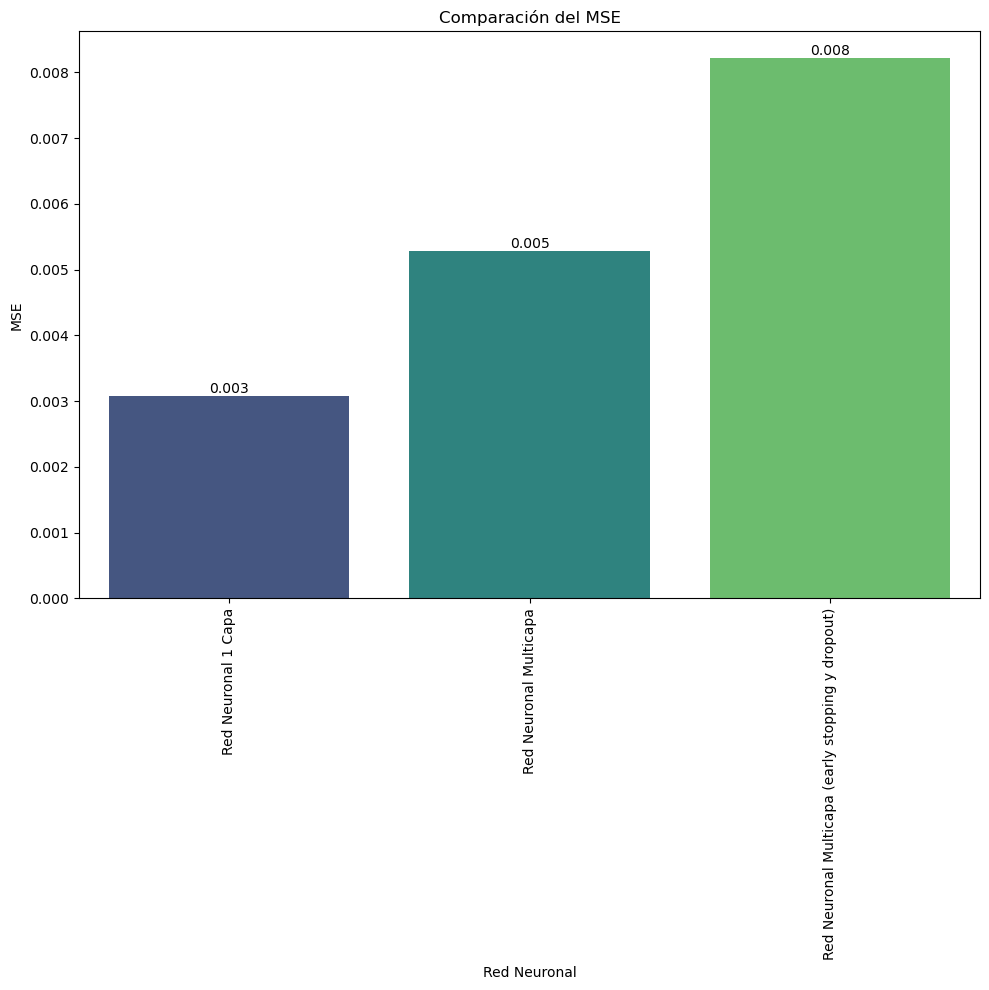

In [20]:
ejex = ['Red Neuronal 1 Capa', 'Red Neuronal Multicapa', 'Red Neuronal Multicapa (early stopping y dropout)']
ejey = [mse_m1, mse_m2, mse_m3]
graficar_b(ejex, ejey, 'MSE')

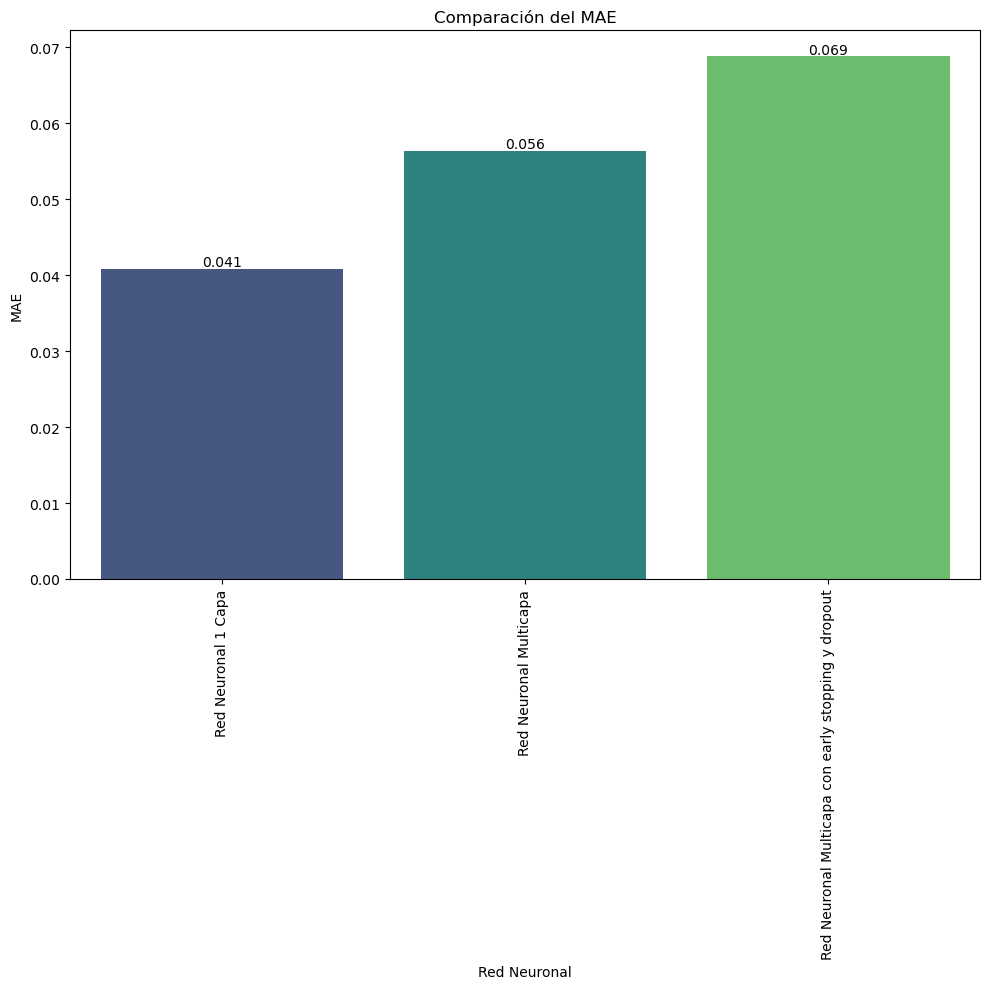

In [21]:
ejex = ['Red Neuronal 1 Capa', 'Red Neuronal Multicapa', 'Red Neuronal Multicapa con early stopping y dropout']
ejey = [mae_m1, mae_m2, mae_m3]
graficar_b(ejex, ejey, 'MAE')

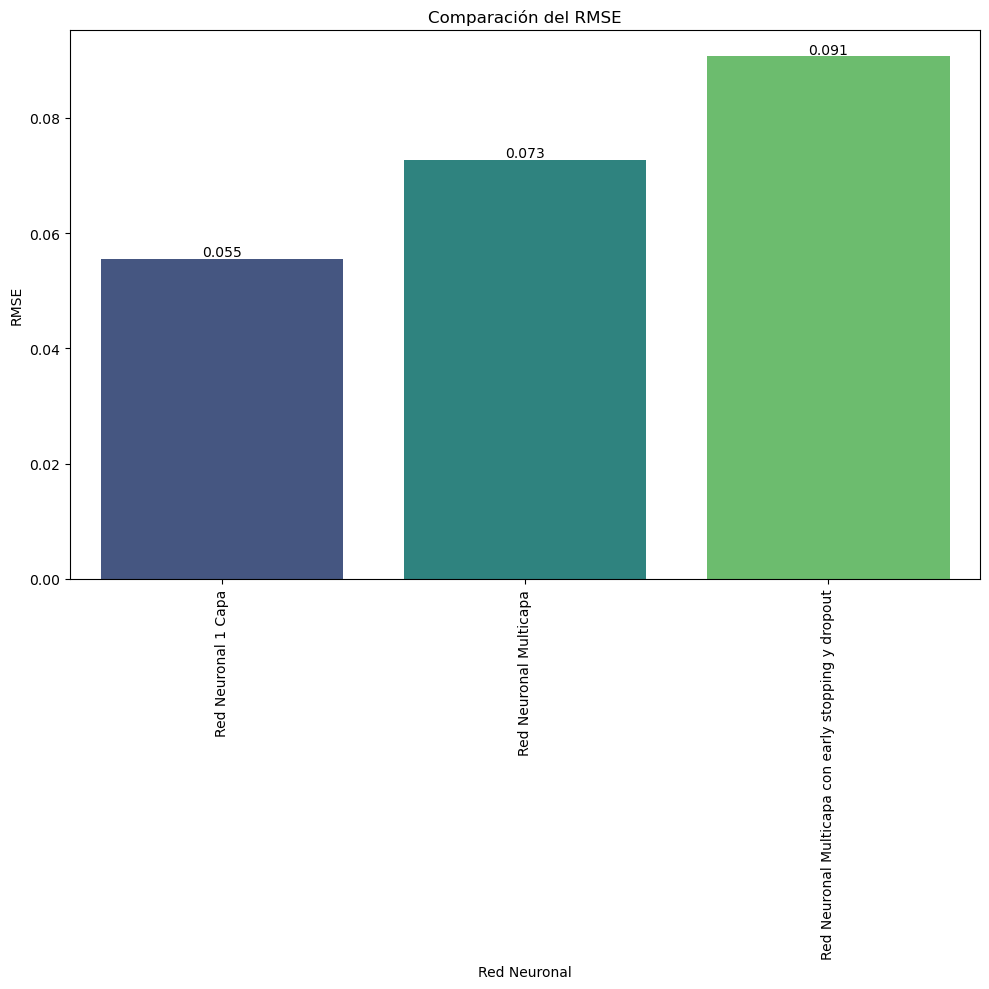

In [22]:
ejex = ['Red Neuronal 1 Capa', 'Red Neuronal Multicapa', 'Red Neuronal Multicapa con early stopping y dropout']
ejey = [rmse_m1, rmse_m2, rmse_m3]
graficar_b(ejex, ejey, 'RMSE')

**Conclusiones**

- Los resultados del MSE, MAE y RMSE en cada modelo, indican un buen desempeño de los modelos. Sin embargo, al aumentar la complejidad en la ejecución y la inclusión y calibración de nuevos hiperparámetros en la red neuronal, se obtuvo un desempeño inferior de predicción.
- En general, el mejor modelo resulta ser el menos complejo, con una sola capa neuronal, 100 épocas de entrenamiento y el uso del optimizador Gradiente Descendente Estocástico (SGD) con la función de pérdida de MSE. Este modelo logra un buen desempeño en términos de capacidad predictiva, obteniendo asi un MSE de 0.003.
- En el tercer modelo, se observa una tendencia de desestabilización en el desempeño del MSE tanto para los datos de entrenamiento como de prueba, con variaciones entre cada época. Además, se evidencia una brecha más amplia entre el MSE de los datos de entrenamiento y de prueba.
- El número de épocas utilizado en el modelo tiene un impacto en su rendimiento. Al comparar los modelos entrenados con diferentes números de épocas, se observó que aquellos que fueron entrenados con un mayor número de épocas tendían a tener un mejor rendimiento en general. Sin embargo,  es importante destacar que la mejora en el rendimiento fue relativamente pequeña. Lo que sugiere que una vez el modelo ha alcanzado la convergencia, es posible que aumentar el número de épocas no proporcione mejoras significativas en términos de rendimiento. Por lo tanto, es importante encontrar un equilibrio adecuado para evitar el sobreajuste y un mayor gasto computacional.  